#### About

> Deep Learning for mathematics

Deep learning for time series data is a machine learning technique that uses artificial neural networks with multiple hidden layers to model and predict time series data. Time series data is data collected over time where the order of the data points is important, such as stock prices, weather data, or sensor readings. Mathematically, deep learning of time series involves the use of neural networks to learn the underlying patterns and structures of time series data. 


A typical deep learning architecture for time series data consists of an input layer, one or more hidden layers, and an output layer. Each layer consists of interconnected nodes (also known as neurons) that process input data and pass it through an activation function to generate output values. During training, the neural weights and biases are learned to optimize the model and make accurate predictions. 

A common type of neural network for time series data is the recurrent neural network (RNN), which is designed to capture the temporal dependencies of the data. RNNs have recurrent connections that allow information to persist over time, making them suitable for sequential data. Another popular RNN variant is the Long Short-Term Memory (LSTM) network, which is capable of capturing long-term dependencies and is particularly efficient at processing long sequences of data.

In addition to RNNs, other types of deep learning models such as Convolutional Neural Networks (CNNs) and transforms can be applied to time series data, depending on the type of data and the specific problem to be solved. The process of training a deep learning model on time series data involves minimizing a loss function that measures the difference between the predicted output and the actual output. The optimizer is used to update the neural weights and biases to minimize losses during training. Once the model is trained, it can be used to predict new, unseen time series data.

Deep learning of time series data has shown promise in various applications such as stock market forecasting, weather forecasting, anomaly detection, and speech recognition. However, it also presents challenges, such as the need for appropriately labeled data, careful handling of overfitting, and proper model selection and hyperparameter tuning.


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from zipfile import ZipFile
import requests
from io import BytesIO


In [15]:
# Download the ZIP file
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip'
response = requests.get(url)
zip_file = ZipFile(BytesIO(response.content))


In [27]:
# Load the CSV file from the ZIP file
with zip_file.open('AirQualityUCI.csv') as file:
    df = pd.read_csv(file, sep=';', decimal=',', parse_dates=[['Date', 'Time']], dayfirst=True)



In [28]:
# Set datetime as index
df.set_index('Date_Time', inplace=True)


In [23]:
# Drop columns with missing values
df = df.dropna()
print(df)


Empty DataFrame
Columns: [Date, Time, CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH, Unnamed: 15, Unnamed: 16]
Index: []


In [29]:
df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
Date_Time,,,,,,,,,,,,,,,
10/03/2004 18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
10/03/2004 19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
10/03/2004 20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
10/03/2004 21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
10/03/2004 22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:

# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 15','Unnamed: 16'])


In [31]:
# Convert object columns to numeric
cols = df.columns
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [32]:
df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
10/03/2004 18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
10/03/2004 19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
10/03/2004 20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
10/03/2004 21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
10/03/2004 22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:

# Impute missing values with mean
df.fillna(df.mean(), inplace=True)

In [34]:
df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
10/03/2004 18.00.00,2.600000,1360.000000,150.000000,11.900000,1046.000000,166.000000,1056.000000,113.000000,1692.000000,1268.000000,13.600000,48.90000,0.757800
10/03/2004 19.00.00,2.000000,1292.000000,112.000000,9.400000,955.000000,103.000000,1174.000000,92.000000,1559.000000,972.000000,13.300000,47.70000,0.725500
10/03/2004 20.00.00,2.200000,1402.000000,88.000000,9.000000,939.000000,131.000000,1140.000000,114.000000,1555.000000,1074.000000,11.900000,54.00000,0.750200
10/03/2004 21.00.00,2.200000,1376.000000,80.000000,9.200000,948.000000,172.000000,1092.000000,122.000000,1584.000000,1203.000000,11.000000,60.00000,0.786700
10/03/2004 22.00.00,1.600000,1272.000000,51.000000,6.500000,836.000000,131.000000,1205.000000,116.000000,1490.000000,1110.000000,11.200000,59.60000,0.788800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
nan nan,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.48538,-6.837604
nan nan,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.48538,-6.837604
nan nan,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.48538,-6.837604


In [35]:
# Normalize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)


In [36]:
# Split the data into train and test sets
train_size = int(len(df_scaled) * 0.8)
test_size = len(df_scaled) - train_size
train, test = df_scaled[0:train_size, :], df_scaled[train_size:len(df_scaled), :]


In [37]:
# Function to create sliding windows of time series data
def create_time_series(data, look_back=1):
    X, Y = [], []
    for i in range(len(data)-look_back):
        X.append(data[i:(i+look_back), :])
        Y.append(data[i+look_back, :])
    return np.array(X), np.array(Y)


In [38]:
# Create time series data with sliding windows
look_back = 24  # number of time steps to look back
X_train, Y_train = create_time_series(train, look_back)
X_test, Y_test = create_time_series(test, look_back)


In [39]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(look_back, df.shape[1])))
model.add(Dense(df.shape[1]))
model.compile(optimizer='adam', loss='mse')

2023-04-22 05:14:20.302445: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-22 05:14:20.305685: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-22 05:14:20.313178: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [41]:
# Train the model
history = model.fit(X_train, Y_train, epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5
213/213 [==============================] - 9s 44ms/step - loss: 0.0073 - val_loss: 0.0081
Epoch 2/5
213/213 [==============================] - 7s 32ms/step - loss: 0.0065 - val_loss: 0.0077
Epoch 3/5
213/213 [==============================] - 7s 34ms/step - loss: 0.0062 - val_loss: 0.0068
Epoch 4/5
213/213 [==============================] - 6s 30ms/step - loss: 0.0059 - val_loss: 0.0069
Epoch 5/5
213/213 [==============================] - 9s 40ms/step - loss: 0.0057 - val_loss: 0.0065


In [42]:
# Evaluate the model
train_loss = model.evaluate(X_train, Y_train, batch_size=32)
test_loss = model.evaluate(X_test, Y_test, batch_size=32)
print("Train Loss:", train_loss)
print("Test Loss:", test_loss)


59/59 [==============================] - 1s 14ms/step - loss: 0.0056
Train Loss: 0.005751556716859341
Test Loss: 0.005553710740059614


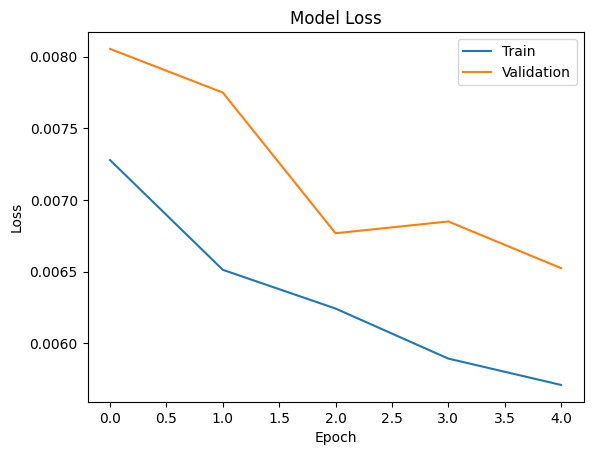

In [43]:
# Plot the training loss and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [44]:
# Make predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)


2023-04-22 05:15:32.027699: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-22 05:15:32.029875: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-22 05:15:32.035663: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

236/236 [==============================] - 4s 13ms/step


2023-04-22 05:15:36.036035: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-22 05:15:36.038993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-22 05:15:36.041080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

59/59 [==============================] - 2s 17ms/step


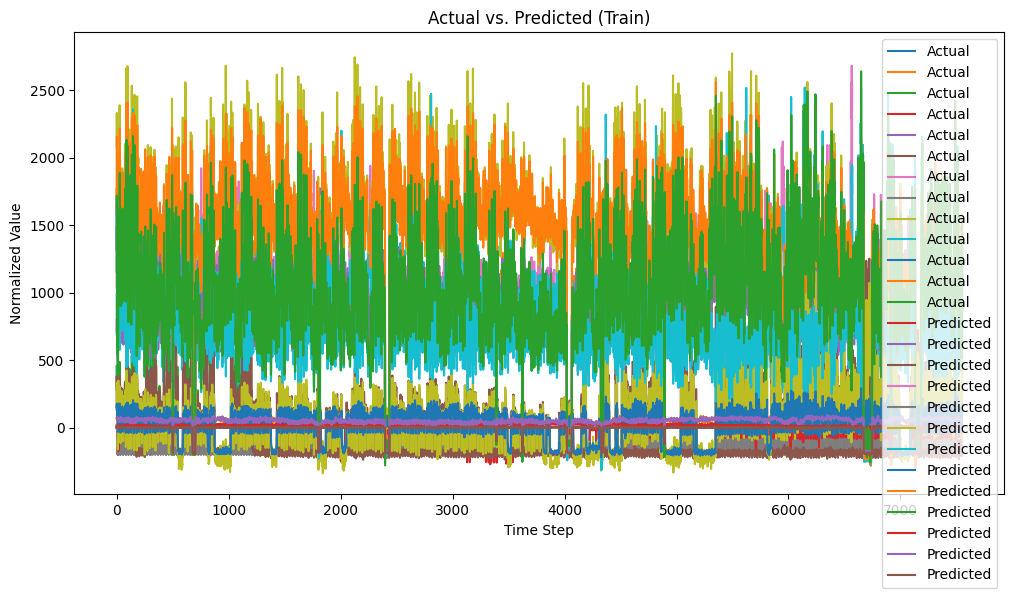

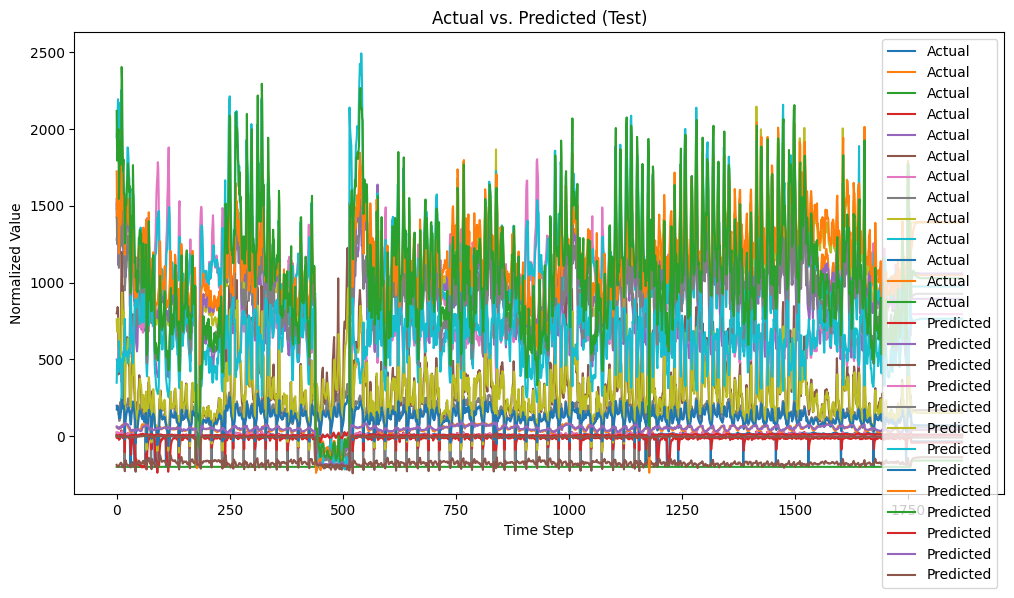

In [45]:
# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(Y_train), label='Actual')
plt.plot(scaler.inverse_transform(train_preds), label='Predicted')
plt.title('Actual vs. Predicted (Train)')
plt.xlabel('Time Step')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(Y_test), label='Actual')
plt.plot(scaler.inverse_transform(test_preds), label='Predicted')
plt.title('Actual vs. Predicted (Test)')
plt.xlabel('Time Step')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()